In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ordner relativ zu der aktuellen Datei
folder_path = "./benchmarking"  # z.B. Ordner "unterordner" im selben Verzeichnis wie dein Skript

# Alle .pkl-Dateien im Ordner
pkl_files = [os.path.join(folder_path, f) 
             for f in os.listdir(folder_path) if f.endswith(".pkl")]

print(pkl_files)

['./benchmarking\\Ridgeregression.pkl', './benchmarking\\Ridgeregression_targetencoding.pkl', './benchmarking\\XGBOOST.pkl', './benchmarking\\XGBOOST_sparsedata.pkl']


In [7]:
data_dict = {}
df_list = []

# Jede Datei laden und als ein großes DataFrame abspeichern
for file in pkl_files:
        df = pd.read_pickle(file)
        df_list.append(df)

In [8]:
combined_df = pd.concat(df_list, axis=0, ignore_index=True)

In [9]:
combined_df['Modell'].unique()

array(['Ridge', 'Ridge_target_encoding', 'XGBOOST', 'XGBOOST_sparse'],
      dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_36268\3036218835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


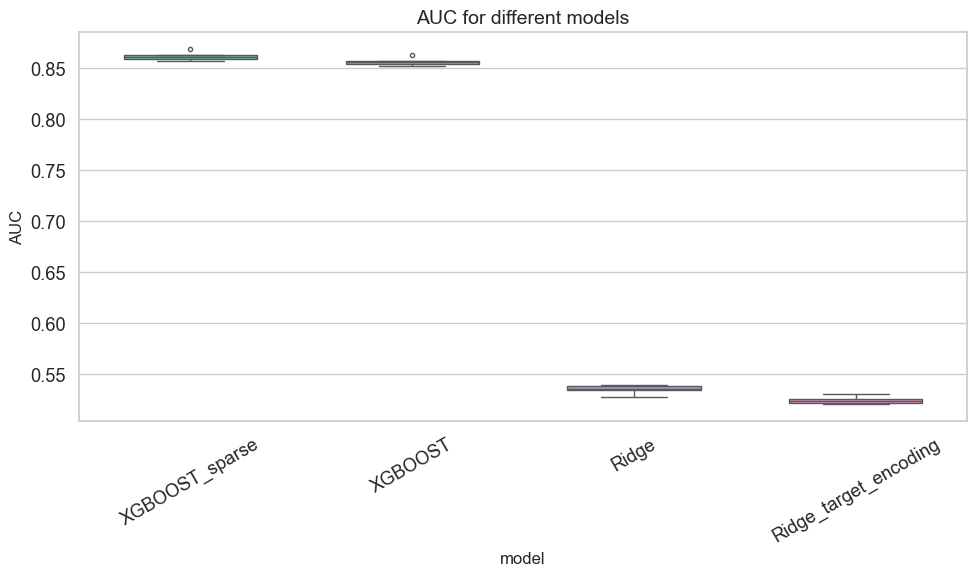

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionaler Style (professionell & sauber)
sns.set(style="whitegrid", font_scale=1.2)

ordered_models = combined_df.groupby("Modell")["R_2"].median().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Modell",
    y="R_2",
    data=combined_df,
    palette="Set2",        # oder "pastel", "muted", "deep"
    width=0.6,
    fliersize=3,
    order = ordered_models            # Größe der Ausreißerpunkte
)



# Achsentitel
ax.set_title("R_2 for different models", fontsize=14)
ax.set_xlabel("model", fontsize=12)
ax.set_ylabel("R_2", fontsize=12)

# Layout sauber anpassen
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()